In [49]:
from qiskit import *
from qiskit.tools.monitor import job_monitor

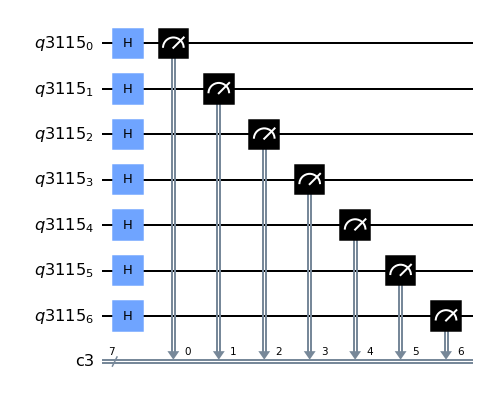

In [43]:
num_bits = 7
num_numbers = 7
qr = QuantumRegister(num_bits)
cr = ClassicalRegister(num_bits)
circuit = QuantumCircuit(qr, cr)

for i in range(num_bits):
    circuit.h(i)

circuit.measure(qr, cr)

circuit.draw(output="mpl")

In [50]:
#from qiskit import IBMQ, Aer
provider = IBMQ.load_account()
available_cloud_backends = provider.backends() 
print('\nHere is the list of cloud backends that are available to you:')
for i in available_cloud_backends: print(i)

available_local_backends = Aer.backends() 
print('\nHere is the list of local backends that are available to you: ')
for i in available_local_backends: print(i)

ibmqfactory.load_account:WARNING:2021-12-11 20:14:44,729: Credentials are already in use. The existing account in the session will be replaced.



Here is the list of cloud backends that are available to you:
ibmq_qasm_simulator
ibmq_armonk
ibmq_santiago
ibmq_bogota
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_manila

Here is the list of local backends that are available to you: 
aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [53]:
# vaihtoehto 1: Simuloidaan piirin toiminta.
simulator = Aer.get_backend('qasm_simulator')
execute(circuit, backend=simulator)
result = execute(circuit, backend=simulator)
#from qiskit.tools.visualization import plot_histogram
#plot_histogram(result.get_counts(circuit))

In [ ]:
# TAi vaihtoehto 2: suoritetaan oikealla kvanttikoneella
#IBMQ.load_account()
#provider = IBMQ.get_provider("ibm_q")
# Ajetaan ohjelma oikealla Ateenassa olevalla kvanttitietokoneella
#computer = provider.get_backend("ibmq_lima")
#result = execute(circuit, backend=computer) # Testataan kvanttipiirin toiminta

In [54]:
job_monitor(result)
print(result.result().get_counts())

Job Status: job has successfully run
{'1001010': 11, '1110100': 6, '0100111': 7, '0111100': 8, '0100100': 8, '1111001': 12, '1111100': 6, '1000110': 6, '0000000': 9, '1110011': 8, '1001111': 7, '0100000': 8, '0100101': 9, '0111011': 7, '0001110': 5, '0110001': 10, '0101111': 9, '1111110': 7, '1000000': 9, '0000011': 5, '0101100': 5, '0110100': 7, '1000101': 10, '1110001': 10, '1001101': 11, '0111110': 12, '0100010': 8, '0011111': 6, '0001001': 13, '1000100': 8, '1111010': 10, '0111000': 10, '1000111': 8, '1111011': 8, '0000001': 5, '0101010': 10, '0110110': 4, '0111101': 5, '0100011': 5, '0001100': 6, '0011011': 6, '0010001': 8, '0100110': 10, '0111010': 10, '1011010': 8, '1101000': 10, '0100001': 12, '0111111': 13, '1110010': 12, '0001010': 6, '1100010': 9, '1111111': 9, '1000011': 8, '0000101': 9, '1000001': 7, '1111101': 4, '0110000': 8, '1101001': 4, '0001000': 6, '0010010': 10, '0010101': 4, '0010110': 8, '1010100': 12, '1010010': 10, '1101111': 4, '1011000': 12, '1010000': 12, '1

In [55]:
def lotto(circuit, simulator):
    
    r = execute(circuit, backend=simulator).result()
    numerot = {}
    
    max_value = 0
    max_key = 0
    isMaxUnique = True
    
    for key, value in r.get_counts().items():
        if value > max_value:
            max_value = value
            max_key = key
            isMaxUnique = True
        elif value == max_value:
            isMaxUnique = False
    
    # Jos saadaan tulokseksi 0 tai yli 40, heitetään uudelleen.
    # Myös jos on kaksi yhtä todennäköistä vastausta, joudutaan heittämään uudelleen
    
    if not isMaxUnique or int(max_key,2)  == 0 or int(max_key,2) > 40:
        return lotto(circuit, simulator)
    
    return int(max_key, 2)

In [56]:
print(lotto(circuit, simulator))

30


In [67]:
numbers = []
while len(numbers) < num_numbers:
    number = lotto(circuit, simulator)
    if number not in numbers:
        numbers.append(number)
        print(numbers)
        
numbers.sort()
print(numbers)

[32]
[32, 21]
[32, 21, 40]
[32, 21, 40, 3]
[32, 21, 40, 3, 37]
[32, 21, 40, 3, 37, 27]
[32, 21, 40, 3, 37, 27, 17]
[3, 17, 21, 27, 32, 37, 40]
